In [387]:
import pandas as pd

In [388]:
!pwd

/Users/priyankadey/Desktop/stuff/research/HIV Spanish Actionable Tweets/hiv-spanishactionabilityclassifier/baselines


In [393]:
### finally fixed the data & got the official translated data 
data = pd.read_csv("../data/deepl/final_joined_translated_data.csv")

#data = pd.read_csv("../data/es_data/translated_tweets.csv")

In [390]:
data.columns

Index(['Unnamed: 0', 'tweet_id', 'tweet_text', 'Translated Tweet', 'NA',
       'availability', 'ads_spam', 'b_actionable', 'b_othersbehavior',
       'b_behrecommendations', 'risk', 'content_campaign',
       'content_nonserious', 'comments', 'coderRecord', 'content_behavior'],
      dtype='object')

In [391]:
data.head()

Unnamed: 0            tweet_id  \
0           0  789492294613405696   
1           1  743076927104126976   
2           2  810938274814525440   
3           3  785858432133988352   
4           4  405834718718861312   

                                          tweet_text  \
0  RT @rdysetdisco: The same ppl against LGBT equ...   
1  RT @FirstLadyKenya: We have won many battles a...   
2  Will Gay Sex-Seeking Mobile Phone Apps Facilit...   
3  RT @UNODC_HIV: .@MonicaBeg: 3 decades of #AIDS...   
4  RT @Dr_Stuart: It's #NationalHIVTestingWeek - ...   

                                    Translated Tweet  \
0  RT @rdysetdisco: Los mismos ppl contra la igua...   
1  RT @FirstLadyKenya: Hemos ganado muchas batall...   
2  ¿Las aplicaciones de teléfonos móviles para bu...   
3  RT @UNODC_HIV: .@MonicaBeg: 3 décadas de respu...   
4  RT @Dr_Stuart: Es la #SemanaDeLasPruebasDelVIH...   

                                                NA availability  ads_spam  \
0  twitter.com/anyuser/statuses/789492294613405696            a       0.0   
1  twitter.com/anyuser/statuses/743076927104126976          NaN       NaN   
2  twitter.com/anyuser/statuses/810938274814525440            a       0.0   
3  twitter.com/anyuser/statuses/785858432133988352          NaN       NaN   
4  twitter.com/anyuser/statuses/405834718718861312            a       0.0   

   b_actionable  b_othersbehavior  b_behrecommendations  risk  \
0           0.0               0.0                   0.0   0.0   
1           NaN               NaN                   NaN   NaN   
2           0.0               0.0                   0.0   0.0   
3           NaN               NaN                   NaN   NaN   
4           0.0               0.0                   0.0   0.0   

   content_campaign  content_nonserious comments  coderRecord  \
0               0.0                 0.0      NaN  Berkelee.v1   
1               NaN                 NaN      NaN          NaN   
2               0.0                 0.0      NaN  Berkelee.v1   
3               NaN                 NaN      NaN          NaN   
4               1.0                 0.0      NaN  Berkelee.v1   

   content_behavior  
0              -1.0  
1               NaN  
2              -1.0  
3               NaN  
4              -1.0

In [392]:
data = data[data['content_behavior'].notna()]
len(data)

10522

In [394]:
len(data)

15861

In [366]:
d = data
d.head()

Unnamed: 0            tweet_id  \
0           0  789492294613405696   
2           2  810938274814525440   
4           4  405834718718861312   
6           6  644198918713159680   
7           7  815286251326763008   

                                          tweet_text  \
0  RT @rdysetdisco: The same ppl against LGBT equ...   
2  Will Gay Sex-Seeking Mobile Phone Apps Facilit...   
4  RT @Dr_Stuart: It's #NationalHIVTestingWeek - ...   
6  RT @xxxSterlingJxxx: Starting #Truvada thank y...   
7  @AshDSanders You were absolutely amazing in Mo...   

                                    Translated Tweet  \
0  RT @rdysetdisco: Los mismos ppl contra la igua...   
2  ¿Las aplicaciones de teléfonos móviles para bu...   
4  RT @Dr_Stuart: Es la #SemanaDeLasPruebasDelVIH...   
6  RT @xxxSterlingJxxx: Empezando #Truvada ¡graci...   
7  @AshDSanders Estuvo absolutamente increíble en...   

                                                NA availability  ads_spam  \
0  twitter.com/anyuser/statuses/789492294613405696            a       0.0   
2  twitter.com/anyuser/statuses/810938274814525440            a       0.0   
4  twitter.com/anyuser/statuses/405834718718861312            a       0.0   
6  twitter.com/anyuser/statuses/644198918713159680            a       0.0   
7  twitter.com/anyuser/statuses/815286251326763008            a       0.0   

   b_actionable  b_othersbehavior  b_behrecommendations  risk  \
0           0.0               0.0                   0.0   0.0   
2           0.0               0.0                   0.0   0.0   
4           0.0               0.0                   0.0   0.0   
6           1.0               0.0                   0.0   1.0   
7           0.0               0.0                   0.0   0.0   

   content_campaign  content_nonserious comments  coderRecord  \
0               0.0                 0.0      NaN  Berkelee.v1   
2               0.0                 0.0      NaN  Berkelee.v1   
4               1.0                 0.0      NaN  Berkelee.v1   
6               0.0                 0.0      NaN  Berkelee.v1   
7               0.0                 0.0      NaN  Berkelee.v1   

   content_behavior  
0              -1.0  
2              -1.0  
4              -1.0  
6               1.0  
7              -1.0

In [143]:
### need to run the script to get user details from this data 
### file to review: tweet_details.result 

import json 
f = open("../data/es_data/tweet_details.result").readlines()

In [151]:
## what are the features we want to extract? 
## the age of user (done)
## age of tweet? (join date - date of tweet made)
## is it a reply? (done)
## does user have a location? 
## is the user protected? 
## follower_count 
## listed at 
## verified? 
## do they have a profile image? 
## how many users to they follow? 
## does the tweet mention users?? 
tweet_created = []
user_mentions = []
tweet_reply_to = []
location = []
protected = []
followers_count = []
friends_count = []
listed_count = []
user_created = []
favourites_count = []
geo_enabled = []
verified = []
statuses_count = []
profile_image = []
following = []

In [152]:
error_count = 0
suspended_count = 0
suspended_ids = []
found_ids = [] 
error_ids = []
for i, _ in enumerate(f):
    data = json.loads(_)
    if 'errors' in data:
        message = data['errors'][0]['message']
        if 'suspended' in message: 
            suspended_count += 1
            suspended_ids.append(tweet_ids[i])
        else: 
            error_count += 1 
            error_ids.append(tweet_ids[i])
    else: 
        found_ids.append(data['id'])
        tweet_created.append(data['created_at'])
        user_mentions.append(len(data['entities']['user_mentions']))
        if data['in_reply_to_status_id'] or data['in_reply_to_screen_name'] or data['in_reply_to_user_id']:
            tweet_reply_to.append(True)
        else:
            tweet_reply_to.append(False)
        if data['user']['location']:
            location.append(True) 
        else: 
            location.append(False)
        if data['user']['protected']:
            protected.append(True) 
        else:
            protected.append(False) 
        followers_count.append(data['user']['followers_count'])
        friends_count.append(data['user']['friends_count'])
        listed_count.append(data['user']['listed_count'])
        user_created.append(data['user']['created_at'])
        favourites_count.append(data['user']['favourites_count'])
        geo_enabled.append(data['user']['geo_enabled'])
        verified.append(data['user']['verified'])
        statuses_count.append(data['user']['statuses_count'])
        if data['user']['profile_image_url']:
            profile_image.append(True)
        else:
            profile_image.append(False)
        if data['user']['following']: 
            following.append(True)
        else:
            following.append(False)
            
print('error count: ', int(error_count))
print('suspended count: ', int(suspended_count))

print(len(found_ids))
print(len(tweet_created))
print(len(following))

error count:  2590
suspended count:  188
8252
8252
8252


In [154]:
### we need to create a new dataframe where we join this content with the actionable or not label 
found_df = pd.DataFrame()
found_df['tweet_id'] = found_ids
found_df['tweet_created'] = tweet_created
found_df['user_mentions'] = user_mentions 
found_df['tweet_reply_to'] = tweet_reply_to
found_df['location'] = location
found_df['protected'] = protected
found_df['followers_count'] = followers_count 
found_df['friends_count'] = friends_count 
found_df['listed_count'] = listed_count 
found_df['user_created'] = user_created
found_df['favourites_count'] = favourites_count 
found_df['geo_enabled'] = favourites_count 
found_df['verified'] = verified
found_df['statuses_count'] = statuses_count 
found_df['profile_image'] = profile_image 
found_df['following'] = following 
found_df['suspended'] = 0
found_df['error'] = 0

error_df = pd.DataFrame()
error_df['error'] = 1
error_df['tweet_id'] = error_ids
error_df['suspended'] = 0

suspended_df = pd.DataFrame()
suspended_df['error'] = 0
suspended_df['tweet_id'] = suspended_ids
suspended_df['suspended'] = 1

print(len(error_ids))
print(len(suspended_ids))

df = pd.concat([error_df, suspended_df])
len(df)

df = pd.concat([df, found_df])
len(df)

# result = pd.merge(df, d, on='tweet_id')

2590
188


11030

In [162]:
### now merge the error columns 
result = pd.merge(df, d)

In [171]:
actionable = result[result['content_behavior'] == 1]
na = result[result['error'] != 0]

In [174]:
## if the id is not in suspended, then it is an error 
na.loc[na.suspended == 0, 'error'] = 1

/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [179]:
na['error'] = na['error'].fillna(0)

<ipython-input-179-ef7bad2930d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  na['error'] = na['error'].fillna(0)


In [182]:
# drop nan in original df & add back na df 
result = result[result['error'].notna()]
result = pd.concat([result, na])

In [186]:
result['error'].unique()

array([0., 1.])

In [187]:
## now, let's do the analysis 

In [197]:
## how many actionable messages are error? 
act = result[result['content_behavior'] == 1]
na = result[result['content_behavior'] != 1]
len(act)

729

In [198]:
len(act[act['error'] == 1])

147

In [199]:
len(act[act['suspended'] == 1]) # 8.84%

13

In [202]:
len(na)

10301

In [203]:
len(na[na['suspended'] == 1]) # 1.7%

175

In [220]:
## let's compute the age of user & age when tweet was written (tweet_created - user_created)
from datetime import datetime
from dateutil.parser import parse

### drop date where we have no data 
result = result[result['user_created'].notna()]

def get_user_age(tc, uc):
    tc = parse(tc)
    uc = parse(uc)
    age = tc - uc 
    total_days = age.total_seconds()/(60.0 * 60.0 * 24.0)
    return total_days

result['age (days)'] = result.apply(lambda row : get_user_age(row['tweet_created'], row['user_created']), axis=1)

KruskalResult(statistic=0.5029493380538373, pvalue=0.4782070673448766)
actionable
1985.0577314814814
492.10675925925926
not actionable
2027.3278125000002
505.85664930555555


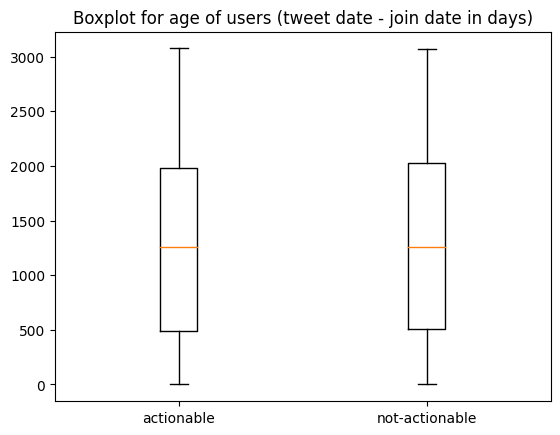

In [326]:
### we should create a scatterplot two toned to see if there's any difference 
from matplotlib import pyplot as plt
act = result[result['content_behavior'] == 1]['age (days)']
na = result[result['content_behavior'] == -1]['age (days)']
#not significant
print(stats.kruskal(act.values, na.values))
my_dict = {'actionable': act.values, 'not-actionable': na.values}

q75, q25 = np.percentile(act.values, [75 ,25])
print("actionable")
print(q75)
print(q25)

q75, q25 = np.percentile(na.values, [75 ,25])
print("not actionable")
print(q75)
print(q25)

fig, ax = plt.subplots()
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())
plt.title("Boxplot for age of users (tweet date - join date in days)")
# plt.boxplot(na)
plt.show()

KruskalResult(statistic=0.02421295312564262, pvalue=0.8763442895500576)
actionable
8925.0
1176.0
not actionable
8925.0
1176.0


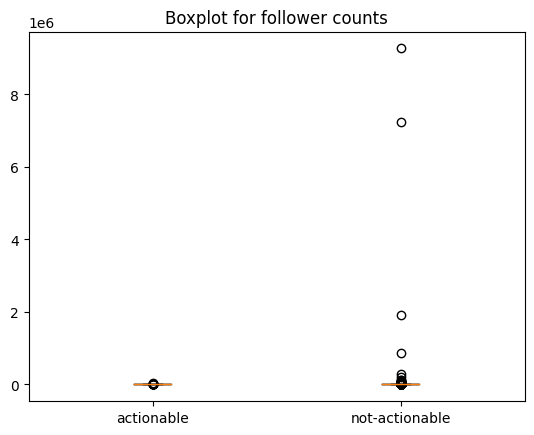

In [325]:
### we should create a scatterplot two toned to see if there's any difference 
from matplotlib import pyplot as plt
act = result[result['content_behavior'] == 1]['followers_count']
na = result[result['content_behavior'] == -1]['followers_count']
#not significant
print(stats.kruskal(act.values, na.values))

my_dict = {'actionable': act.values, 'not-actionable': na.values}

q75, q25 = np.percentile(act.values, [75 ,25])
print("actionable")
print(q75)
print(q25)

q75, q25 = np.percentile(na.values, [75 ,25])
print("not actionable")
print(q75)
print(q25)

fig, ax = plt.subplots()
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())
plt.title("Boxplot for follower counts")
# plt.boxplot(na)
plt.show()


### one possible observation: a higher follower count is negatively correlated with actionability? 
### we should do a correlation analysis on this 

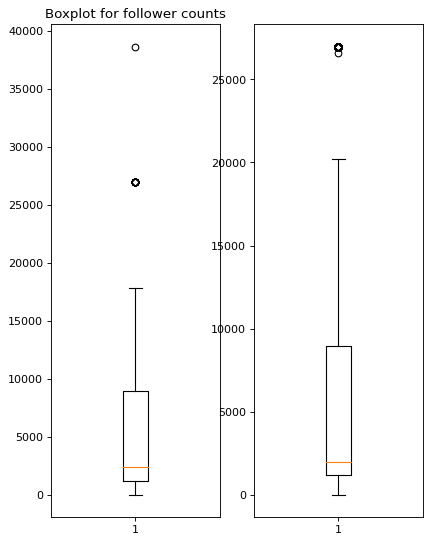

In [269]:
# no difference for the age of a user 
from matplotlib.pyplot import figure

figure(figsize=(6, 8), dpi=80)

# let's try follower counts
plt.subplot(1, 2, 1)
my_dict = {'actionable': act.values}
# fig, ax = plt.subplots()
plt.boxplot(my_dict.values())
# ax.set_xticklabels(my_dict.keys())
plt.title("Boxplot for follower counts")
# plt.boxplot(na)

na = sorted(na.values)[0:7250]
plt.subplot(1,2,2)
my_dict = {'not-actionable': na}
plt.boxplot(my_dict.values())
# ax.set_xticklabels(my_dict.keys())

plt.show()

In [276]:
### quite similar so not much to see here 
## let's try verified status 
act = result[result['content_behavior'] == 1].groupby(['verified']).count().reset_index()
na = result[result['content_behavior'] == -1].groupby(['verified']).count().reset_index()

print(act)
print(na)


#### no relation here either :(

   verified  error  tweet_id  suspended  tweet_created  user_mentions  \
0     False    471       471        471            471            471   
1      True     98        98         98             98             98   

   tweet_reply_to  location  protected  followers_count  ...  \
0             471       471        471              471  ...   
1              98        98         98               98  ...   

   b_othersbehavior  b_behrecommendations  risk  content_campaign  \
0               427                   432   470               406   
1                85                    90    96                86   

   content_nonserious  comments  coderRecord  content_behavior  age  \
0                 399        41          471               471  471   
1                  83         1           98                98   98   

   age (days)  
0         471  
1          98  

[2 rows x 37 columns]
   verified  error  tweet_id  suspended  tweet_created  user_mentions  \
0     False   6152   

KruskalResult(statistic=0.09411761769790154, pvalue=0.7590063049540106)
 actionable
188.0
30.0
not actionable
188.0
30.0


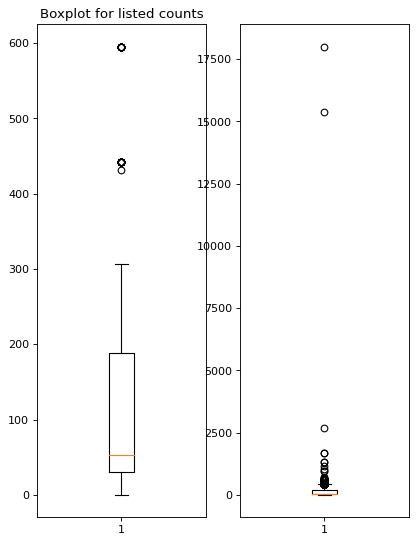

In [324]:
from matplotlib.pyplot import figure

figure(figsize=(6, 8), dpi=80)
act = result[result['content_behavior'] == 1]['listed_count']
na = result[result['content_behavior'] == -1]['listed_count']

#not significant
print(stats.kruskal(act.values, na.values))

# let's try listed counts
plt.subplot(1, 2, 1)
q75, q25 = np.percentile(act.values, [75 ,25])
print(" actionable")
print(q75)
print(q25)
my_dict = {'actionable': act.values}
# fig, ax = plt.subplots()
plt.boxplot(my_dict.values())
# ax.set_xticklabels(my_dict.keys())
plt.title("Boxplot for listed counts")
# plt.boxplot(na)

q75, q25 = np.percentile(na.values, [75 ,25])
print("not actionable")
print(q75)
print(q25)
na = sorted(na.values)
plt.subplot(1,2,2)
my_dict = {'not-actionable': na}
plt.boxplot(my_dict.values())
# ax.set_xticklabels(my_dict.keys())

plt.show()

KruskalResult(statistic=1.8356724568885885, pvalue=0.17545900987639337)
actionable
13764.0
4002.0
not actionable
13764.0
4002.0


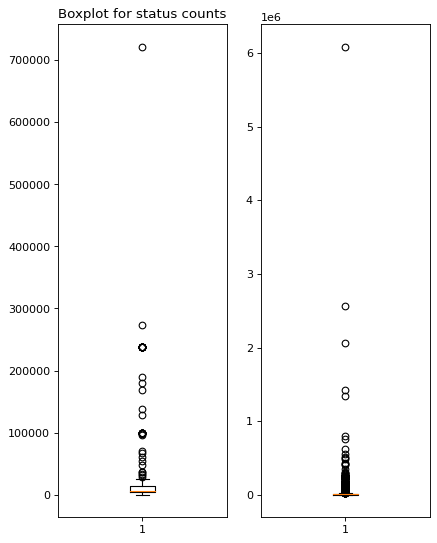

In [323]:
from matplotlib.pyplot import figure
import numpy as np

figure(figsize=(6, 8), dpi=80)
act = result[result['content_behavior'] == 1]['statuses_count']
na = result[result['content_behavior'] == -1]['statuses_count']

#not significant
print(stats.kruskal(act.values, na.values))

# let's try listed counts
plt.subplot(1, 2, 1)
# act = sorted(act.values)[0:1400]
q75, q25 = np.percentile(act.values, [75 ,25])
print("actionable")
print(q75)
print(q25)
my_dict = {'actionable': act}
# fig, ax = plt.subplots()
plt.boxplot(my_dict.values())
# ax.set_xticklabels(my_dict.keys())
plt.title("Boxplot for status counts")
# plt.boxplot(na)

# na = sorted(na.values)
q75, q25 = np.percentile(na.values, [75 ,25])
print("not actionable")
print(q75)
print(q25)
plt.subplot(1,2,2)
my_dict = {'not-actionable': na}
plt.boxplot(my_dict.values())
# ax.set_xticklabels(my_dict.keys())

plt.show()

In [308]:
### geo_enabled 

### quite similar so not much to see here 
## let's try verified status 
act = result[result['content_behavior'] == 1].groupby(['location']).count().reset_index()
na = result[result['content_behavior'] == -1].groupby(['location']).count().reset_index()

# print(act)
na
# print(na)


#### no relation here either :(

location  error  tweet_id  suspended  tweet_created  user_mentions  \
0     False    656       656        656            656            656   
1      True   6643      6643       6643           6643           6643   

   tweet_reply_to  protected  followers_count  friends_count  ...  \
0             656        656              656            656  ...   
1            6643       6643             6643           6643  ...   

   b_othersbehavior  b_behrecommendations  risk  content_campaign  \
0               656                   656   652               653   
1              6643                  6643  6596              6627   

   content_nonserious  comments  coderRecord  content_behavior   age  \
0                 655        63          656               656   656   
1                6637       709         6643              6643  6643   

   age (days)  
0         656  
1        6643  

[2 rows x 37 columns]

In [321]:
### favourites_count 

### quite similar so not much to see here 
## let's try verified status 
act = result[result['content_behavior'] == 1]['favourites_count']
na = result[result['content_behavior'] == -1]['favourites_count']
result_ = result['favourites_count']

q75, q25 = np.percentile(act.values, [90 ,25])
print("actionable")
print(q75)
print(q25)
q75, q25 = np.percentile(na.values, [90 ,25])
print("not-actionable")
print(q75)
print(q25)


#### some relation here perhaps (non-actionable users seem to add much more favourite tweets)
#### let's do some correlation analysis to see if this is true? 
print('act: mean=%.3f stdv=%.3f' % (np.mean(act.values), np.std(act.values)))
print('not act: mean=%.3f stdv=%.3f' % (np.mean(na.values), np.std(na.values)))
print('total: mean=%.3f stdv=%.3f' % (np.mean(result_.values), np.std(result_.values)))

actionable
7755.59999999999
887.0
not-actionable
10211.0
887.0
act: mean=4440.694 stdv=11880.264
not act: mean=6379.239 stdv=16913.723
total: mean=6218.047 stdv=16550.717


In [322]:
### find variance between the whole dataset for the continous variable ()
### find variance between the two groups () ---> did not give any good results in fact better not grouping 

## also test using ANOVA and/or Kruskall-Wallis test 
## ok so as per kruskal wallis test, the p-value is below 0.05, so potentially significant (favourites_count)
from scipy import stats
stats.kruskal(act.values, na.values) 

KruskalResult(statistic=8.561143447553343, pvalue=0.0034341366151384063)

In [330]:
### profile_image 

act = result[result['content_behavior'] == 1].groupby(['profile_image']).count().reset_index()
na = result[result['content_behavior'] == -1].groupby(['profile_image']).count().reset_index()

# print(act)
na
# print(na)


#### no relation here either :(

profile_image  error  tweet_id  suspended  tweet_created  user_mentions  \
0           True   7299      7299       7299           7299           7299   

   tweet_reply_to  location  protected  followers_count  ...  \
0            7299      7299       7299             7299  ...   

   b_othersbehavior  b_behrecommendations  risk  content_campaign  \
0              7299                  7299  7248              7280   

   content_nonserious  comments  coderRecord  content_behavior   age  \
0                7292       772         7299              7299  7299   

   age (days)  
0        7299  

[1 rows x 37 columns]

In [350]:
### tone analysis too 
### let's see an initial survey into this 
### let's get 100 tweets for nonactionable 

tweets = result[result['content_behavior'] != 1]['tweet_text_x']
# for tweet in tweets.values:
#     print(tweet)
    
    
## potentially fear and sadness could be linked with actionable messages??? 
## joy in non-actionable messages 
len(tweets)
# tweets.to_csv("../data/non_actionable_tweets.txt")

7683

In [355]:
### trying to see if their previous messages are more fact or opinion  (actually idk why this would work)
### non-actionable: RT @scrippsresearch: New grants boost HIV vaccine research at TSRI http://t.co/OmKC6OreiU but this is a fact 
### actionable: 
data = data[data['tweet_id'].notna()]
data['tweet_id'] = data['tweet_id'].astype(int)
tweet_ids = data['tweet_id'].values
print(tweet_ids[4500])

776458874979225600


In [367]:
### so the data is fixed now 
### let's try to analyze some of the messages from actionable and not actionable now 
act = data[data['content_behavior'] == 1]
na = data[data['content_behavior'] == -1]

In [374]:
### why are the numbers so much lower than the original data???
print(len(act))
len(na)

571


9951

In [377]:
act['tweet_text'].values[0:15]

array(['RT @xxxSterlingJxxx: Starting #Truvada thank you @ARCOhio for helping me! @rawtaurus officially on #PrEP http://t.co/bFRvMlytGL',
       'Setting up our new HIV Testing room. #HIV #hivstigma #hivtesting #hivaidsawareness… https://t.co/Ldv4kXpwdW',
       'Young people who have #HIV &amp; know it are less likely to have sex w/out a #condom. Testing, knowing matters!… https://t.co/YV5cKTAPWW',
       'RT @DrMerminCDC: #Gay, bi men- Watch this great explainer vid on #PrEP &amp; see if it’s right for you! https://t.co/OPonuy1Gl6 #HIV',
       'No woman should die of cervical #cancer! #Women &amp; #clinicians, work together for prevention w/ #HPV vax &amp; PAP tests… https://t.co/vApFMjHFsf',
       "RT @MSF_USA: Take HIV testing to the community, door to door, to the schools. They're going to be the future leaders. #AIDS2016 https://t.c…",
       'Abt half of #HIV+ young #gay men don’t know their status. Get tested. https://t.co/nSE2RpEIPs https://t.co/G8fTmDi7b2',
       'NYC: Mor

In [378]:
na['tweet_text'].values[0:15]

array(['RT @rdysetdisco: The same ppl against LGBT equality are the ones against repro rights. We must move together-Julianna Gonen, NCLR #SharedOp…',
       'Will Gay Sex-Seeking Mobile Phone Apps Facilitate Group Sex? Survey among MSM in China https://t.co/u5UdOLXXNs HT @uncglobalhealth  #HIV',
       "RT @Dr_Stuart: It's #NationalHIVTestingWeek - Myths &amp; Truths about #HIV Tests http://t.co/JSptk4n0eT #TestMeEast",
       '@AshDSanders You were absolutely amazing in Moonlight, Sir. Stunning acting! Happy New Year! Hope to see you on the big screen again soon.',
       'African-American #women are dispro affected by #HIV, 6 of 10 diagnoses among women in 2014. https://t.co/IkbIvVT4C4 https://t.co/CCirWNr8fR',
       'These Vintage Gay Pride Photos Will Make You Feel All the Feels https://t.co/oOHqqxAS1E via @oscarraymundo',
       '#Hepatitis causes more liver-related health problems amg people w/ #HIV. https://t.co/9PVOrKLquL #Prevention https://t.co/8U0ARMA6Zc',
       'Young pe

In [383]:
na['tweet_id'].values[10]

817050633698209792

In [385]:
### dumb step: check if the word testing exists in the message (likely more actionable then)
act.to_csv("../data/es_data/actionable_tweets.csv")
na.to_csv("../data/es_data/not_actionable_tweets.csv")

In [397]:
len(act) + len(na)

10522

In [400]:
len(found_ids)

8252

In [401]:
len(favourites_count)

8252

In [402]:
favourites = pd.DataFrame()
favourites['Tweet_ID'] = found_ids + error_ids + suspended_ids 
favourites['Favourites'] = favourites_count + (['NA'] * len(error_ids + suspended_ids))

In [421]:
ids = (set(found_ids))
act_ids = list(act['tweet_id'].values)
na_ids = list(na['tweet_id'].values)
ids_ = act_ids + na_ids
ids_ = set(ids_)
len(ids.intersection(ids_))

7251

In [422]:
len(ids)

8252

In [423]:
favourites.to_csv("favourites_count.csv")

In [424]:
!pwd

/Users/priyankadey/Desktop/stuff/research/HIV Spanish Actionable Tweets/hiv-spanishactionabilityclassifier/baselines


In [429]:
list(favourites['Favourites'].values)

[2906,
 1093,
 4470,
 2906,
 25724,
 87,
 887,
 87,
 87,
 4470,
 0,
 1093,
 21,
 2510,
 1892,
 2298,
 4082,
 3276,
 222,
 10211,
 4470,
 75506,
 438,
 10211,
 1892,
 1093,
 887,
 2298,
 2298,
 1039,
 87,
 87,
 2906,
 5703,
 887,
 7279,
 7510,
 1892,
 2298,
 4082,
 887,
 1093,
 1506,
 3276,
 2298,
 887,
 2298,
 87,
 4082,
 887,
 272,
 1039,
 7510,
 1766,
 5703,
 1892,
 2298,
 87,
 3276,
 1892,
 87,
 679,
 1093,
 2298,
 4470,
 3276,
 1581,
 7279,
 3276,
 10211,
 887,
 887,
 75506,
 87,
 887,
 87,
 49,
 1892,
 2906,
 10211,
 3276,
 1093,
 1039,
 1892,
 4082,
 3276,
 5703,
 887,
 887,
 27279,
 2298,
 2298,
 75506,
 7510,
 87,
 1581,
 7510,
 2510,
 0,
 25724,
 3276,
 2298,
 2298,
 679,
 7510,
 75506,
 887,
 3276,
 887,
 480,
 5703,
 887,
 2298,
 10211,
 1093,
 4082,
 87,
 4,
 49,
 1892,
 10211,
 2510,
 10211,
 2906,
 2510,
 2510,
 5703,
 1676,
 2510,
 10211,
 87,
 10211,
 1892,
 1920,
 887,
 1892,
 887,
 87,
 1092,
 887,
 3276,
 1093,
 87,
 2298,
 1039,
 7510,
 49,
 4082,
 1581,
 87,
 3276,

In [431]:
len("{\"document_tone\":{\"tones\":[]}}")

30

In [446]:
tones = open("../data/final_results_should_be_10000.jsonl")
tones = tones.readlines()
count=0
for t in tones:
    tones_ = json.loads(t)
    tones_ = tones_['document_tone']['tones']
    if len(tones_) > 0:
        count += 1
#     print(t)
#     if len(t) > 31: 
#         count += 1
        
print(count)

6234


In [451]:
#### last-idea find the most common & long n-grams for actionable & non-actionable messages
spanish_data = pd.read_csv("../data/spanish_data_glove_tone_favs.csv")
spanish_data.columns

Index(['Unnamed: 0', 'Unnamed: 0_x', 'Unnamed: 0.1', 'tweet_id',
       'tweet_text_x', 'Translated_Tweet', 'tweet_text_y', 'status', 'NA',
       'availability', 'ads_spam', 'b_actionable', 'b_othersbehavior',
       'b_behrecommendations', 'risk', 'content_campaign',
       'content_nonserious', 'comments', 'coderRecord', 'content_behavior',
       'preproc_tweets', 'Spanish Embedded Tweet', 'Confident', 'Analytical',
       'Tentative', 'Joy', 'Sadness', 'Fear', 'Anger', 'Unnamed: 0_y',
       'Tweet_ID', 'Favourites'],
      dtype='object')

In [544]:
spanish_data['preproc_tweets'] = spanish_data[''].astype(str)
act = list(spanish_data[spanish_data['content_behavior'] == 1]['preproc_tweets'].values)
na = list(spanish_data[spanish_data['content_behavior'] == -1]['preproc_tweets'].values)

print(len(set(na)))

8524


In [462]:
from collections import Counter
from nltk import ngrams

In [500]:
len(act)

748

In [463]:
act_corpus = ' '.join(act)
na_corpus = ' '.join(na)

In [490]:
def find_distinct(act, na):
    act_ = []
    na_ = []
    for a in act:
        act_.append(a[0])
    for n in na:
        na_.append(n[0])
        
    ## find distinct in na and a :
    d_a = []
    d_na = []
    for a in act_:
        if a not in na_:
            d_a.append(a)
    for n in na_:
        if n not in act_:
            d_na.append(n)
            
    return d_a, d_na

In [532]:
ngram_counts = Counter(ngrams(act_corpus.split(), 7))
act_6grams = ngram_counts.most_common(25)

ngram_counts = Counter(ngrams(na_corpus.split(), 7))
na_6grams = ngram_counts.most_common(25)

In [533]:
d6_a, d6_na = find_distinct(act_6grams, na_6grams)

In [542]:
act_ngrams = ['learn more about', 'testing services', 'testing services guidelines']
na_ngrams = ['promotion of new guidelines', 'did you participate in', 'of new guidelines on hiv <allcaps> testing']

for a in act: 
    for ngram in act_ngrams: 
        if ngram in a:
            print(a)

rt <allcaps> <user>: who <allcaps> launches consolidated guidelines on hiv <allcaps> testing services at <hashtag> ias <allcaps><number> support the launch! <hashtag> test<number>hiv <allcaps>
 <url>…
rt <allcaps> <user>: want to learn more about treatment as <hashtag> prevention for <hashtag> aids? <allcaps> check out <user> on <hashtag> wad <allcaps><number> for how we’re working to reach
<user> mark your calendar on sept <number> to learn more about new <user> <hashtag> hiv <allcaps> testing services guidelines <url> <hashtag> test<number>hiv
<user> mark your calendar on sept <number> to learn more about new <user> <hashtag> hiv <allcaps> testing services guidelines <url> <hashtag> test<number>hiv
<user> mark your calendar on sept <number> to learn more about new <user> <hashtag> hiv <allcaps> testing services guidelines <url> <hashtag> test<number>hiv
<user> mark your calendar on sept <number> to learn more about new <user> <hashtag> hiv <allcaps> testing services guidelines <url> 